In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [8]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

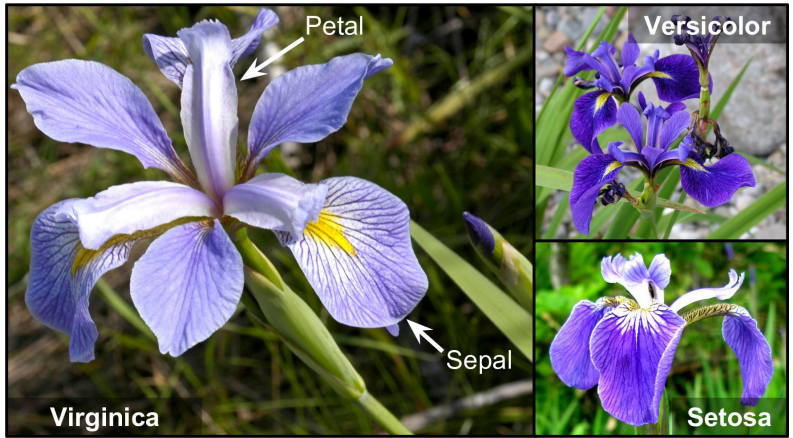

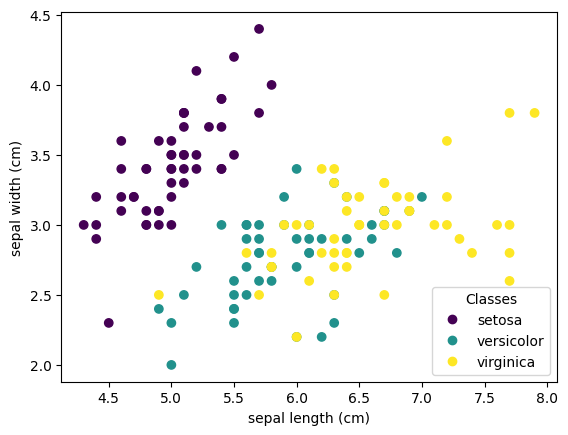

In [4]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

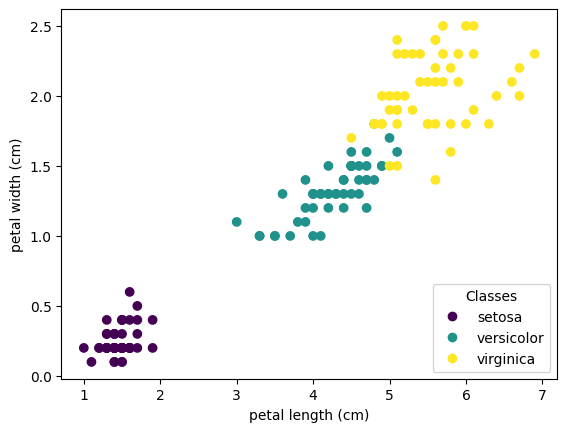

In [6]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# PCA representation

* apply a Principal Component Analysis (PCA) to the iris dataset and then plot the irises across the first three PCA dimensions.

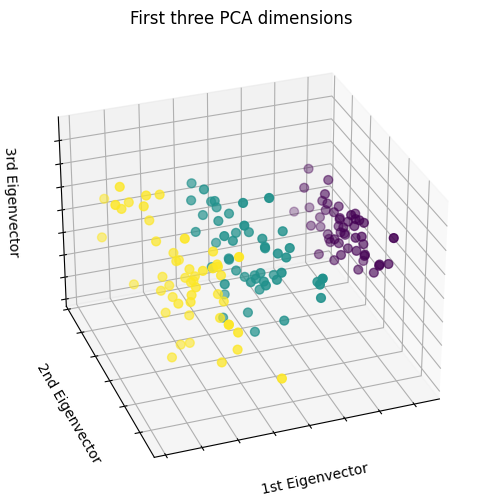

In [7]:
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

# Dataset split

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



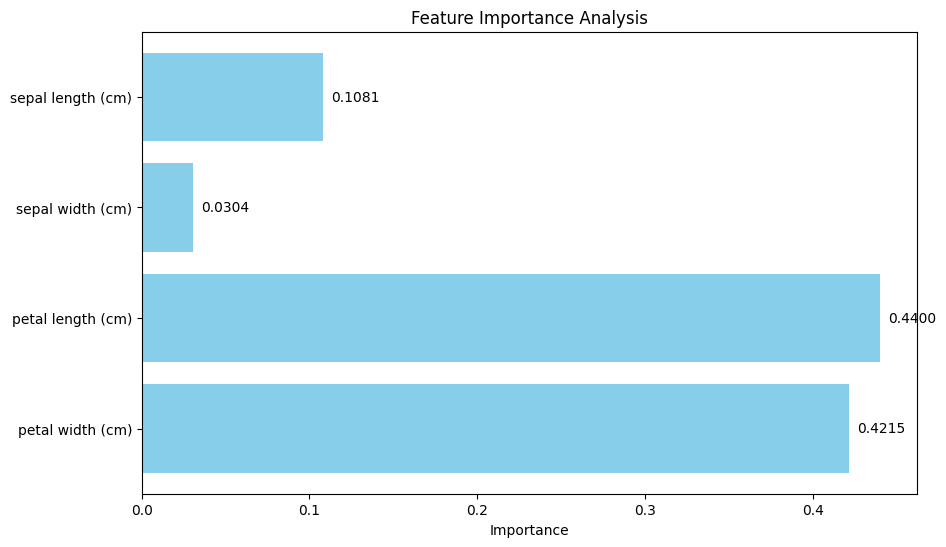

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the dataset into a training set and a testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict the target labels on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

# Visualize feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = iris.feature_names

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, feature_importances, color='skyblue')

# Display the importance values at the end of each bar
for bar, importance in zip(bars, feature_importances):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{importance:.4f}', ha='left', va='center', fontsize=10)

plt.xlabel('Importance')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


Model: LogisticRegression
[fold 0] Accuracy: 1.00000
[fold 1] Accuracy: 0.93333
[fold 2] Accuracy: 0.80000
[fold 3] Accuracy: 0.93333
[fold 4] Accuracy: 1.00000
[fold 5] Accuracy: 0.86667
[fold 6] Accuracy: 0.86667
[fold 7] Accuracy: 0.93333
[fold 8] Accuracy: 1.00000
[fold 9] Accuracy: 0.86667
Running time: 0.129s 
Mean Accuracy: 0.9200000000000002
Mean Scores:
['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00         6\n           2       1.00      1.00      1.00         3\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      0.67      0.80         3\n           2       0.89      1.00      0.94         8\n\n    accuracy    

[fold 2] Accuracy: 1.00000
[fold 3] Accuracy: 0.93333
[fold 4] Accuracy: 1.00000
[fold 5] Accuracy: 0.86667
[fold 6] Accuracy: 0.86667
[fold 7] Accuracy: 1.00000
[fold 8] Accuracy: 0.93333
[fold 9] Accuracy: 0.86667
Running time: 0.766s 
Mean Accuracy: 0.9466666666666667
Mean Scores:
['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00         6\n           2       1.00      1.00      1.00         3\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         8\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.

[fold 0] Accuracy: 1.00000
[fold 1] Accuracy: 1.00000
[fold 2] Accuracy: 1.00000
[fold 3] Accuracy: 0.93333
[fold 4] Accuracy: 0.93333
[fold 5] Accuracy: 0.86667
[fold 6] Accuracy: 0.86667
[fold 7] Accuracy: 1.00000
[fold 8] Accuracy: 0.93333
[fold 9] Accuracy: 0.93333
Running time: 1.203s 
Mean Accuracy: 0.9466666666666667
Mean Scores:
['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00         6\n           2       1.00      1.00      1.00         3\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         8\n\n    accuracy                           1.0

[fold 5] Accuracy: 0.86667
[fold 6] Accuracy: 0.86667
[fold 7] Accuracy: 1.00000
[fold 8] Accuracy: 0.93333
[fold 9] Accuracy: 0.93333
Running time: 0.387s 
Mean Accuracy: 0.9466666666666667
Mean Scores:
['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00         6\n           2       1.00      1.00      1.00         3\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         8\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '        

C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[fold 0] Accuracy: 0.93333
[fold 1] Accuracy: 1.00000
[fold 2] Accuracy: 0.80000


C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[fold 3] Accuracy: 0.93333
[fold 4] Accuracy: 1.00000
[fold 5] Accuracy: 0.86667


C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[fold 6] Accuracy: 0.86667
[fold 7] Accuracy: 1.00000
[fold 8] Accuracy: 1.00000


C:\Users\rupes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[fold 9] Accuracy: 0.86667
Running time: 1.041s 
Mean Accuracy: 0.9266666666666667
Mean Scores:
['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      0.83      0.91         6\n           2       0.75      1.00      0.86         3\n\n    accuracy                           0.93        15\n   macro avg       0.92      0.94      0.92        15\nweighted avg       0.95      0.93      0.94        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         8\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         9\n    

[fold 8] Accuracy: 1.00000
[fold 9] Accuracy: 0.86667
Running time: 0.111s 
Mean Accuracy: 0.9600000000000002
Mean Scores:
['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00         6\n           2       1.00      1.00      1.00         3\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         8\n\n    accuracy                           1.00        15\n   macro avg       1.00      1.00      1.00        15\nweighted avg       1.00      1.00      1.00        15\n', '              precision    recall  f1-score   support\n\n           0       1.00      1.0

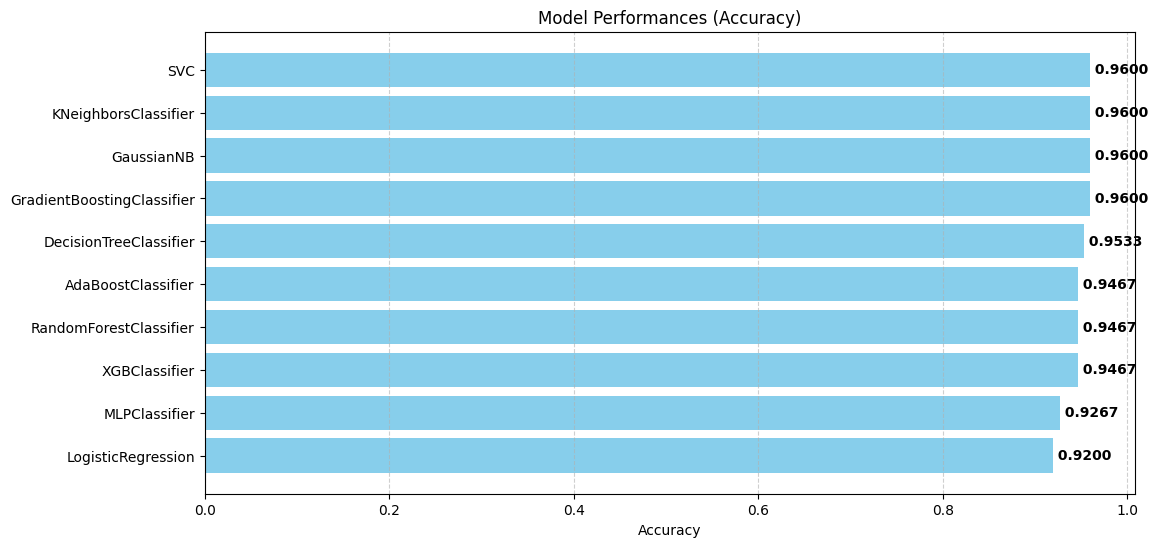

In [20]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Define ML models for classification
models = [
    LogisticRegression(),
    SVC(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    MLPClassifier(),
    KNeighborsClassifier(),
    GaussianNB()
]

def cv(model):
    n_folds = 10
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    start_time = time.time()
    accuracy_scores = []
    classification_reports = []
    confusion_matrices = []
    fold_index = 0
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

        X_scaler = MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Calculate accuracy and other classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracy_scores.append(accuracy)
        classification_reports.append(report)
        confusion_matrices.append(conf_matrix)
        print("[fold {0}] Accuracy: {1:.5f}".format(fold_index, accuracy))
        fold_index += 1

    # Running time
    print('Running time: %.3fs ' % (time.time() - start_time))
    return np.mean(accuracy_scores), classification_reports, confusion_matrices

results = []

for model in models:
    model_name = model.__class__.__name__
    print("Model:", model_name)
    accuracy, mean_scores, _ = cv(model)
    result = [model_name, accuracy, mean_scores]
    results.append(result)
    print("Mean Accuracy:", accuracy)
    print("Mean Scores:")
    print(mean_scores)
    print("--------------------------------------")

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Classification Reports'])
results_df = results_df.set_index('Model')
print(results_df)
results_df.to_excel("All classifiers results.xlsx")
# Sort the results DataFrame by accuracy
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Create a bar plot to visualize model performances
plt.figure(figsize=(12, 6))
plt.barh(sorted_results_df.index, sorted_results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performances (Accuracy)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with accuracy values
for i, v in enumerate(sorted_results_df['Accuracy']):
    plt.text(v, i, f' {v:.4f}', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()



The best model based on Accuracy is: SVC
Metrics for the best model:
Accuracy                                                               0.96
Classification Reports    [              precision    recall  f1-score  ...
Name: SVC, dtype: object


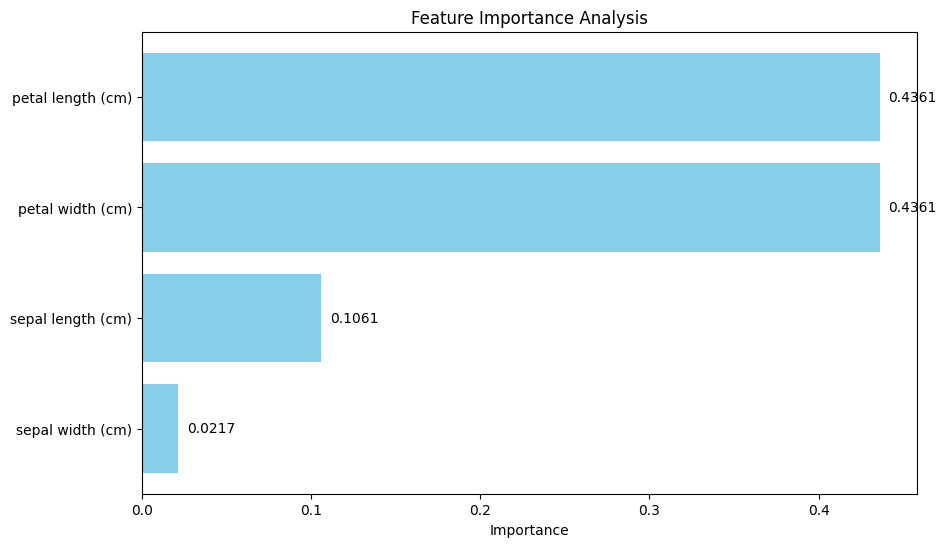

In [23]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Define the metrics to be plotted
metrics = ['Accuracy']

# Create a list of model names
model_names = results_df.index



# Select the model with the highest accuracy
best_model = results_df['Accuracy'].idxmax()
print("The best model based on Accuracy is:", best_model)

# Find the row corresponding to the best model in the results DataFrame
best_model_metrics = results_df.loc[best_model]

# Print all metrics for the best model
print("Metrics for the best model:")
print(best_model_metrics)

# Feature Importance Analysis
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Display the importance values at the end of each bar
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{importance:.4f}', ha='left', va='center', fontsize=10)

plt.xlabel('Importance')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


## Learning Curve

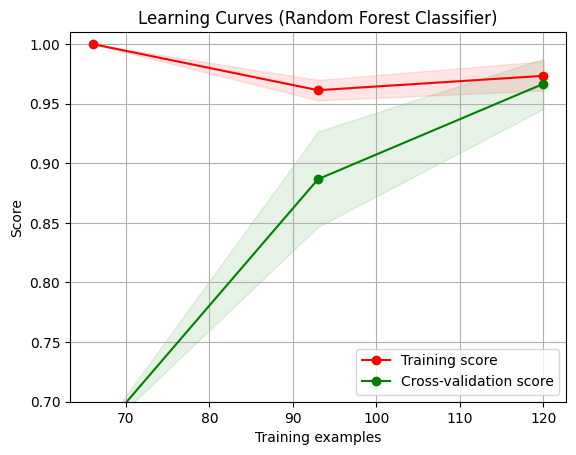

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Support Vector Machine Classifier
selected_model = SVC()

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Specify the title for the learning curve plot
title = f"Learning Curves (Random Forest Classifier)"

# Plot the learning curve
plot_learning_curve(selected_model, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


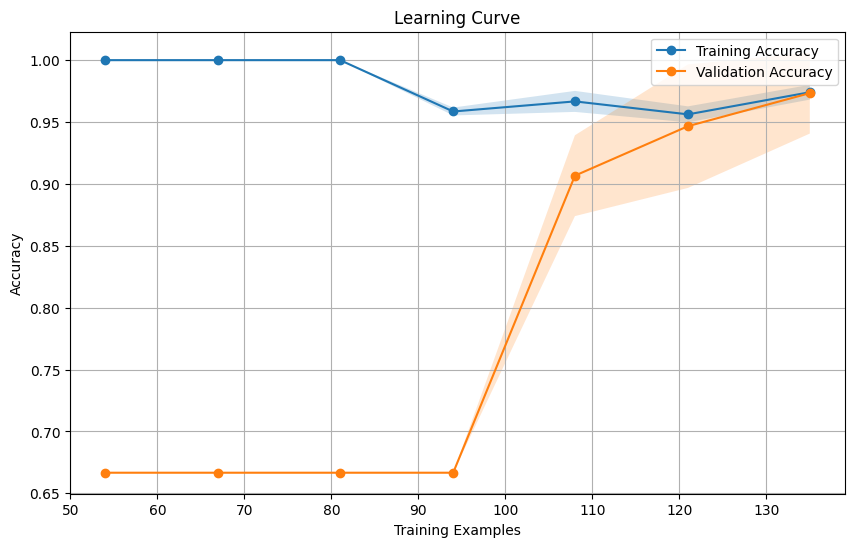

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the selected model (e.g., RandomForestClassifier)
selected_model = SVC()

# Specify the train sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    selected_model, X, y, train_sizes=train_sizes, cv=10, scoring='accuracy', n_jobs=-1
)

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


# SHAP Analysis

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


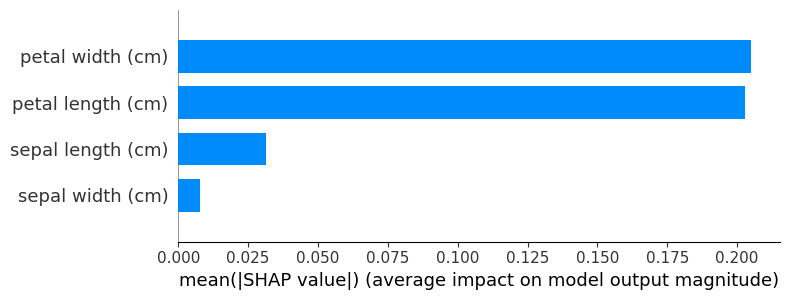

In [24]:
import shap

# Create a SHAP explainer for the best model (Random Forest Classifier)
explainer = shap.TreeExplainer(rf_model)

# Get SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

# Summarize the impact of each feature on the model's output
shap.summary_plot(shap_values[1], X, feature_names=X.columns, plot_type='bar', title='SHAP Feature Importance')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


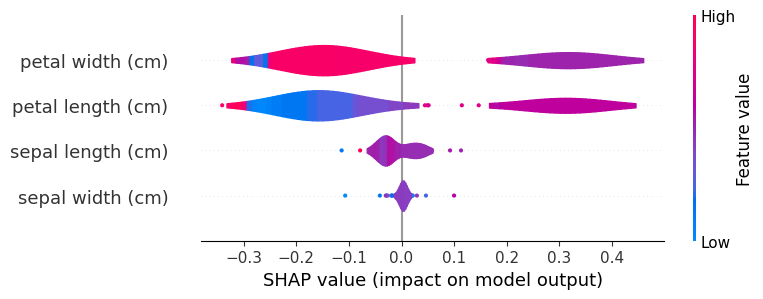

In [26]:
import shap

# Create a SHAP explainer for the best model (Random Forest Classifier)
explainer = shap.TreeExplainer(rf_model)

# Get SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

# Create a beeswarm plot for SHAP values
shap.summary_plot(shap_values[1], X, feature_names=X.columns, plot_type='violin', title='SHAP Beeswarm Plot')


# Hyperparameter Tuning

## Using grid search method

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the selected model (SVC)
selected_model = SVC()

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=selected_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X, y)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Print the best model
print("Best Model:")
print(best_model)


Best Hyperparameters:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Model:
SVC(C=0.1, kernel='poly')


## Using Optuna Library

In [36]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define an objective function for Optuna to optimize
def objective(trial):
    # Define hyperparameter search space
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)  # Regularization parameter with log-uniform distribution
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    gamma = trial.suggest_float('gamma', 1e-6, 1e+1, log=True) if kernel != 'linear' else 'scale'

    # Create an SVC model with suggested hyperparameters
    model = SVC(C=C, kernel=kernel, gamma=gamma)

    # Perform cross-validation and return the mean accuracy
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

    return accuracy

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=500)  # 500 iterations

# Get the best hyperparameters and corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:")
print(best_params)
print("Best Accuracy:", best_accuracy)


[I 2023-10-09 21:05:55,909] A new study created in memory with name: no-name-d38efbdc-fb8b-4581-bb5d-bbee342a8b43
[I 2023-10-09 21:05:55,942] Trial 0 finished with value: 0.3333333333333333 and parameters: {'C': 0.010284161447852167, 'kernel': 'sigmoid', 'gamma': 4.5990602494142525}. Best is trial 0 with value: 0.3333333333333333.
[I 2023-10-09 21:05:55,967] Trial 1 finished with value: 0.9533333333333334 and parameters: {'C': 0.5858036990828278, 'kernel': 'rbf', 'gamma': 0.03387336547975406}. Best is trial 1 with value: 0.9533333333333334.
[I 2023-10-09 21:05:55,989] Trial 2 finished with value: 0.9666666666666666 and parameters: {'C': 1.1710335626155133, 'kernel': 'poly', 'gamma': 0.19371533129934337}. Best is trial 2 with value: 0.9666666666666666.
[I 2023-10-09 21:05:56,018] Trial 3 finished with value: 0.9133333333333334 and parameters: {'C': 8.178712418077071e-05, 'kernel': 'rbf', 'gamma': 6.8794218674008655e-06}. Best is trial 2 with value: 0.9666666666666666.
[I 2023-10-09 21:0

[I 2023-10-09 21:05:57,751] Trial 39 finished with value: 0.96 and parameters: {'C': 0.07146774680201674, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:57,779] Trial 40 finished with value: 0.9733333333333334 and parameters: {'C': 4.414983232759952, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:57,808] Trial 41 finished with value: 0.9800000000000001 and parameters: {'C': 0.4118231120340324, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:57,844] Trial 42 finished with value: 0.9866666666666667 and parameters: {'C': 0.6676103837239251, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:57,874] Trial 43 finished with value: 0.9800000000000001 and parameters: {'C': 1.17050709219695, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:57,902] Trial 44 finished with value: 0.96666666666

[I 2023-10-09 21:05:59,221] Trial 81 finished with value: 0.9800000000000001 and parameters: {'C': 1.4495790046414685, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:59,254] Trial 82 finished with value: 0.9800000000000001 and parameters: {'C': 1.025258432808289, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:59,283] Trial 83 finished with value: 0.9733333333333334 and parameters: {'C': 3.017577105521079, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:59,320] Trial 84 finished with value: 0.9733333333333334 and parameters: {'C': 6.37961920583499, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:59,350] Trial 85 finished with value: 0.9800000000000001 and parameters: {'C': 0.3341117969202987, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:05:59,382] Trial 86 finished with value: 0

[I 2023-10-09 21:06:00,481] Trial 124 finished with value: 0.9800000000000001 and parameters: {'C': 0.20302120889925399, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:00,511] Trial 125 finished with value: 0.9866666666666667 and parameters: {'C': 0.5107607597074951, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:00,538] Trial 126 finished with value: 0.9733333333333334 and parameters: {'C': 3.485447334975832, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:00,566] Trial 127 finished with value: 0.9666666666666666 and parameters: {'C': 0.11084796656201772, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:00,601] Trial 128 finished with value: 0.9000000000000001 and parameters: {'C': 1.5202454935466676, 'kernel': 'rbf', 'gamma': 0.0041012294853194015}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:

[I 2023-10-09 21:06:01,800] Trial 167 finished with value: 0.9800000000000001 and parameters: {'C': 0.36124399156657316, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:01,839] Trial 168 finished with value: 0.9866666666666667 and parameters: {'C': 1.6748794440761068, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:01,874] Trial 169 finished with value: 0.9866666666666667 and parameters: {'C': 0.6213765426884129, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:01,913] Trial 170 finished with value: 0.52 and parameters: {'C': 0.16653855333427584, 'kernel': 'sigmoid', 'gamma': 0.021251543943100568}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:01,966] Trial 171 finished with value: 0.9866666666666667 and parameters: {'C': 0.7319884365256919, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:01,994] Tr

[I 2023-10-09 21:06:03,253] Trial 210 finished with value: 0.9800000000000001 and parameters: {'C': 0.47349189207201225, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:03,281] Trial 211 finished with value: 0.9800000000000001 and parameters: {'C': 0.4814749185043012, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:03,313] Trial 212 finished with value: 0.9800000000000001 and parameters: {'C': 1.3079431065225111, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:03,343] Trial 213 finished with value: 0.9866666666666667 and parameters: {'C': 0.6759462905751139, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:03,376] Trial 214 finished with value: 0.9800000000000001 and parameters: {'C': 0.23566344467367156, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:03,407] Trial 215 finished w

[I 2023-10-09 21:06:05,655] Trial 253 finished with value: 0.9800000000000001 and parameters: {'C': 0.40834780679044597, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:05,690] Trial 254 finished with value: 0.9866666666666667 and parameters: {'C': 0.9593515243847307, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:05,727] Trial 255 finished with value: 0.9066666666666666 and parameters: {'C': 0.026560446305418033, 'kernel': 'poly', 'gamma': 0.04666217542672096}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:05,757] Trial 256 finished with value: 0.9800000000000001 and parameters: {'C': 2.4312384806578984, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:05,785] Trial 257 finished with value: 0.9866666666666667 and parameters: {'C': 0.5042140367147548, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06

[I 2023-10-09 21:06:07,824] Trial 296 finished with value: 0.9000000000000001 and parameters: {'C': 0.01234468203237755, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:07,869] Trial 297 finished with value: 0.3333333333333333 and parameters: {'C': 1.785129373357556e-05, 'kernel': 'sigmoid', 'gamma': 0.5354360883080228}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:07,900] Trial 298 finished with value: 0.9800000000000001 and parameters: {'C': 0.15087664608547535, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:07,932] Trial 299 finished with value: 0.9800000000000001 and parameters: {'C': 0.346510342919826, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:07,971] Trial 300 finished with value: 0.9533333333333334 and parameters: {'C': 0.06293066534806666, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 2

[I 2023-10-09 21:06:09,586] Trial 339 finished with value: 0.96 and parameters: {'C': 0.07451432289269978, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:09,618] Trial 340 finished with value: 0.9800000000000001 and parameters: {'C': 0.4705417457442895, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:09,648] Trial 341 finished with value: 0.9800000000000001 and parameters: {'C': 1.0333194802560424, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:09,682] Trial 342 finished with value: 0.9800000000000001 and parameters: {'C': 0.31818491592854203, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:09,939] Trial 343 finished with value: 0.9733333333333334 and parameters: {'C': 3.352487592143716, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:09,976] Trial 344 finished with value: 0.96

[I 2023-10-09 21:06:11,339] Trial 382 finished with value: 0.9666666666666666 and parameters: {'C': 29376.483219283684, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:11,373] Trial 383 finished with value: 0.9133333333333334 and parameters: {'C': 0.0021498268956912626, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:11,404] Trial 384 finished with value: 0.96 and parameters: {'C': 0.04247284548933082, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:11,439] Trial 385 finished with value: 0.9133333333333334 and parameters: {'C': 4.7476645540291196e-05, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:11,472] Trial 386 finished with value: 0.9800000000000001 and parameters: {'C': 0.1987535332342228, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:11,506] Trial 387 finished with valu

[I 2023-10-09 21:06:13,148] Trial 425 finished with value: 0.9866666666666667 and parameters: {'C': 1.337813960991541, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:13,180] Trial 426 finished with value: 0.9866666666666667 and parameters: {'C': 0.7280311217680242, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:13,213] Trial 427 finished with value: 0.9800000000000001 and parameters: {'C': 2.1150778072557266, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:13,248] Trial 428 finished with value: 0.9800000000000001 and parameters: {'C': 0.268789966608898, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:13,313] Trial 429 finished with value: 0.9533333333333334 and parameters: {'C': 3.5355407649380313, 'kernel': 'poly', 'gamma': 0.554184868666825}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:13,351

[I 2023-10-09 21:06:14,894] Trial 468 finished with value: 0.3333333333333333 and parameters: {'C': 1.659184609028904, 'kernel': 'sigmoid', 'gamma': 2.2129727745697423}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:14,933] Trial 469 finished with value: 0.9800000000000001 and parameters: {'C': 0.15452373126141997, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:14,976] Trial 470 finished with value: 0.9666666666666666 and parameters: {'C': 3.257446810778124e-05, 'kernel': 'poly', 'gamma': 7.4547907242684595}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:15,011] Trial 471 finished with value: 0.9866666666666667 and parameters: {'C': 0.5870598227498566, 'kernel': 'linear'}. Best is trial 34 with value: 0.9866666666666667.
[I 2023-10-09 21:06:15,046] Trial 472 finished with value: 0.9533333333333334 and parameters: {'C': 0.031756352065668354, 'kernel': 'linear'}. Best is trial 34 with value: 0.986666

Best Hyperparameters:
{'C': 0.7615028371499483, 'kernel': 'linear'}
Best Accuracy: 0.9866666666666667


# Best Hyperparameter of the SVC model

***
Best Hyperparameters:
{'C': 0.7615028371499483, 'kernel': 'linear'}
Best Accuracy: 0.9866666666666667
***

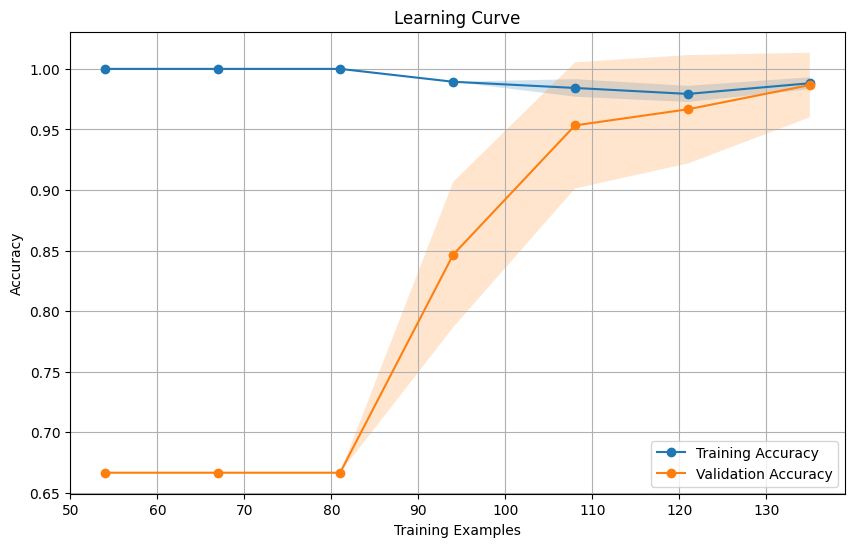

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the selected model (e.g., RandomForestClassifier)
selected_model = SVC(C=0.7615028371499483,kernel='linear')

# Specify the train sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    selected_model, X, y, train_sizes=train_sizes, cv=10, scoring='accuracy', n_jobs=-1
)

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()
